# Business Understanding


This project is based on the analysis of house sales data in King County, for real estate agencies to advise home owners on how performing a renovation might increase the estimated value of their homes thereby helping homeowners make informed decisions regarding home improvements and investments

# Understanding the data

From the Column Names file we are able to understand the King County Data Set lot better and understand what each column represent.

Here are the column names and what they decribe

* id - Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
* view - Quality of view from house
* condition - How good the overall condition of the house is. Related to maintenance of house.
* grade - Overall grade of the house. Related to the construction and design of the house.
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from random import gauss
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #Now lets go ahead and import our data
df = pd.read_csv('kc_house_data.csv')

In [3]:
#Checking the shape of our data
df.shape

(21597, 21)

In [4]:
#Checking the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
#Checking general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


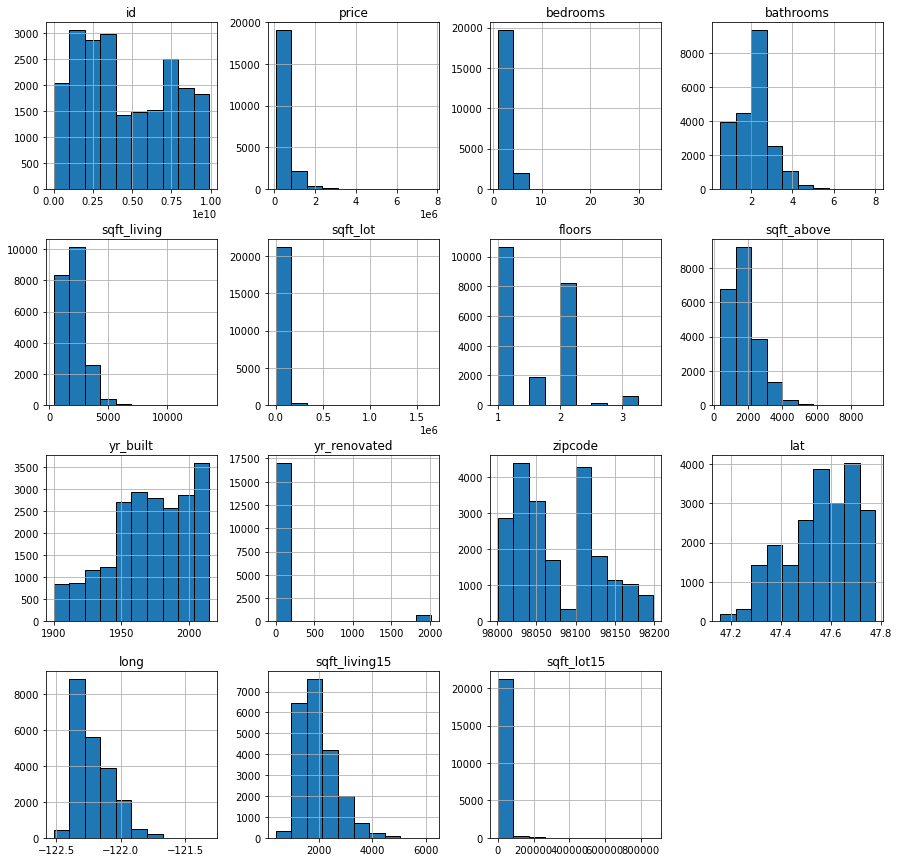

In [7]:
# Visualizing the columns from the data
df.hist(figsize = (15,15), edgecolor = 'black');

Through viewing the data, we are able to see the different data types we are working with. and from this we need to clean the data

# DATA CLEANING

Here I will work on to clean the data and make it more useful. I will start by getting to know the missing values in the dataset. I will accomplish this by writing a function that will give me a number of missing values in each column and the percentage.

In [8]:
# the function below gets the missing values of the dataset.
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [9]:
# I will now call the function and pass my dataset through it to get my desired output.
missing_values(df)

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015
2,view,63,0.002917


We get to know that the colmns with missing values are 'yr_renovated', 'waterfront' and 'view' with a percentage of; 17%, 11% and .2% respectively.

We will now work on the missing values by filling them since they have a significance into our analysis. We will fill the missing values using

I will write a function to help me get this done

In [10]:
# write a function to take the data and column name and fill the missing values with the mode
def fill_values(data, column_name):
    # get the mode of the column
    most_frequent_time = data[column_name].mode()[0]

    # fill the missing values with the most_frequent_time
    data[column_name].fillna(most_frequent_time, inplace= True)

    return data

In [11]:
# fill view column using the function
df = fill_values(df, 'view')
missing_values(df)

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015


In [12]:
#  fill yr_renovated column using the function
df = fill_values(df, 'yr_renovated')
missing_values(df)

,index,Missing Values,Percentage
0,waterfront,2376,0.110015


In [13]:
#  fill waterfront column using the function
df = fill_values(df, 'waterfront')
missing_values(df)

,index,Missing Values,Percentage


Here we have filled all the missing values we can confirm that by checking the whole dataset using .info()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have enough confirmation that the data does not have any missing values.

We can now move to changing the data types of various columns in order to have a seamless analysis.

# Fix structural issues.
Fix the datatypes.

In [15]:
# Convert 'id' to object
df['id'] = df['id'].astype('object')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'waterfront', 'view', 'condition', and 'grade' to categorical
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')

# Convert 'sqft_basement' to numeric (handle non-numeric values appropriately)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Convert 'yr_renovated' to integer
df['yr_renovated'] = df['yr_renovated'].astype('Int64')

We now note that the datatypes are changed. We can now proceed.

you will notice that after changing the data types especially with the 'sqft_basement' when I changed it to numeric the values that could not be converted to numeric, they were turned to NaN while keeping the numeric values intact.

This means that we will have to work on the missing values

In [16]:
# I will first check the number and percentage of the missing values
missing_values(df)


,index,Missing Values,Percentage
0,sqft_basement,454,0.021021


The percentage of the missing values is 2%. I will drop the rows with missing values.

In [17]:
# Drop rows with missing values in the 'sqft_basement' column
df.dropna(subset=['sqft_basement'], inplace=True)

# The 'inplace=True' argument modifies the original DataFrame 'df' in place

# Unique values

Here i willl check all the unique values in the dataframe and remove the unnecessary characters.

In [18]:
def unique_characters_summary(data):
    # Initialize an empty DataFrame to store the results
    unique_chars_df = pd.DataFrame(columns=['Column', 'Unique Characters'])

    # Loop through each column in the DataFrame
    for column_name in data.columns:
        # Get unique characters in the column
        unique_chars = set("".join(data[column_name].astype(str)))

        # Store the result in the DataFrame
        unique_chars_df = unique_chars_df.append({'Column': column_name, 'Unique Characters': "".join(unique_chars)}, ignore_index=True)

    return unique_chars_df

In [19]:
#Checking the unique characters of the data
unique_characters_summary(df)

,Column,Unique Characters
0,id,4139605827
1,date,4-139605827
2,price,413960582.7
3,bedrooms,4139605827
4,bathrooms,41360582.7
5,sqft_living,4139605827
6,sqft_lot,4139605827
7,floors,13052.
8,waterfront,YNSOE
9,view,NRILCDOXTEGAFV


 Looking at the data we notice that all the columns have characters that are consistent with each value and the datatypes of the columns.

We can now move to check the outliers of the dataset.

In [20]:
df.drop(columns = ['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [21]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

# Checking for outliers

I will use a code that will plot box plots of all the numeric columns of my dataset inorder to get a visual of the data is distributed

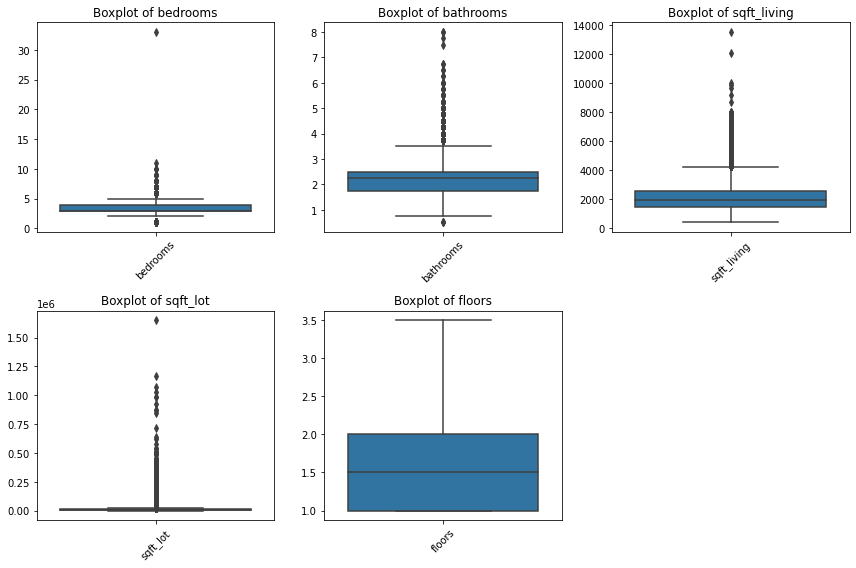

In [22]:
# Defining a list of column names for which you want to create box plots
columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

# Setting up the figure and axis for plotting
plt.figure(figsize=(12, 8))

# Looping through the selected columns and create box plots
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)  # Create a subplot for each column
    sns.boxplot(data= df[[column]])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Since we have more numeric columns we will repeat the plotting and make our comments.


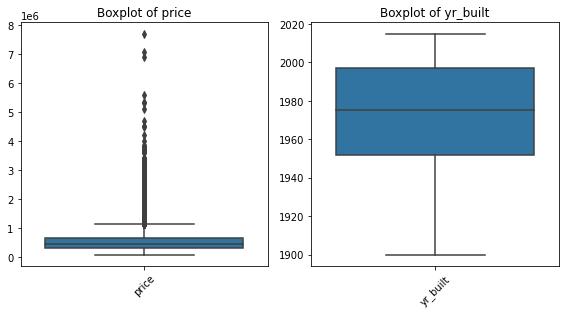

In [23]:
# Defining a list of column names for which you want to create box plots
columns_to_plot = ['price', 'yr_built']

# Setting up the figure and axis for plotting
plt.figure(figsize=(12, 8))

# Looping through the selected columns and create box plots
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)  # Create a subplot for each column
    sns.boxplot(data= df[[column]])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# WE CAN SEE 33 BEDROOMS AND OTHER ANOMALIES THAT WILL BE CONSIDER OUTLIERS

pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,21143,21143,21143,21143,21143,21143,21143
mean,"540,510.73",3.37,2.12,"2,080.92","15,087.14",1.49,"1,971.02"
std,"368,075.06",0.92,0.77,918.55,"41,209.20",0.54,29.32
min,78000,1,0.50,370,520,1,1900
25%,322000,3,1.75,1430,5043,1,1952
50%,450000,3,2.25,1910,7620,1.50,1975
75%,645000,4,2.50,2550,"10,695.50",2,1997
max,7700000,33,8,13540,1651359,3.50,2015


In [25]:
#Checking to see description for column bedrooms
df.bedrooms.describe()

count   21143
mean     3.37
std      0.92
min         1
25%         3
50%         3
75%         4
max        33
Name: bedrooms, dtype: float64

In [26]:
#Removing the outliers
# Calculating Q1, Q3, and IQR
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df= df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

Now ,lets check the describe for bedrooms and see if we did remove the outlier

In [27]:
df.bedrooms.describe()

count   20630
mean     3.35
std      0.80
min         2
25%         3
50%         3
75%         4
max         5
Name: bedrooms, dtype: float64

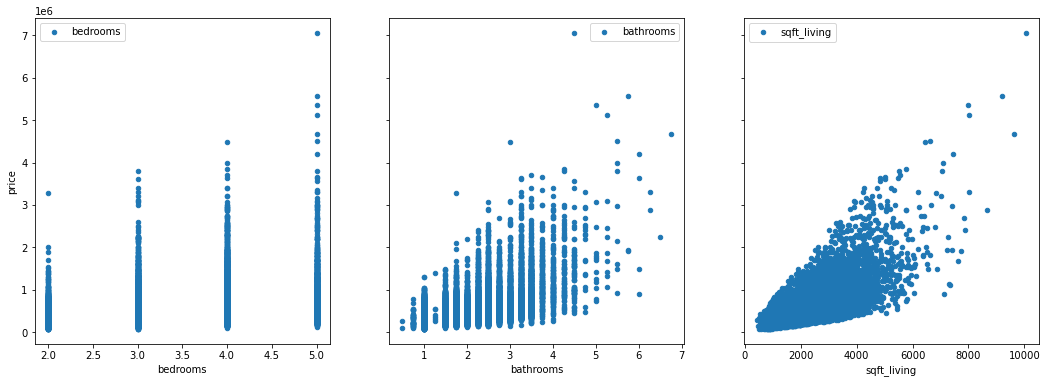

In [28]:
#Plotting the relationship between price with bedrooms,bathrooms and sqft_living after removing the outliers
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

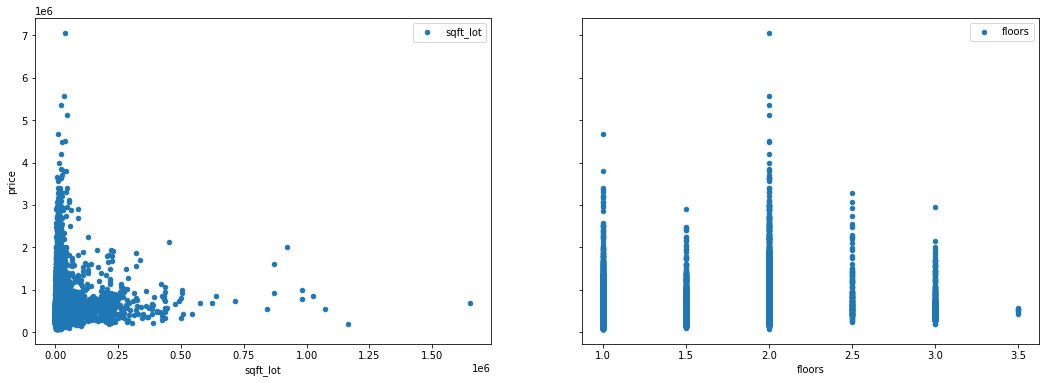

In [29]:
#Plotting the relationship between price and sqft_lot and floors after removing outliers

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

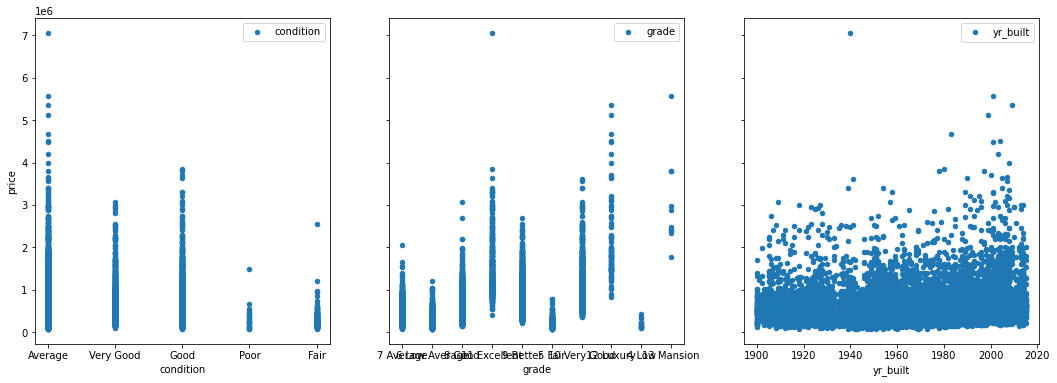

In [30]:
#Plotting the relationship between price and condition,grade and yr_built after removing outliers


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['condition', 'grade', 'yr_built']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

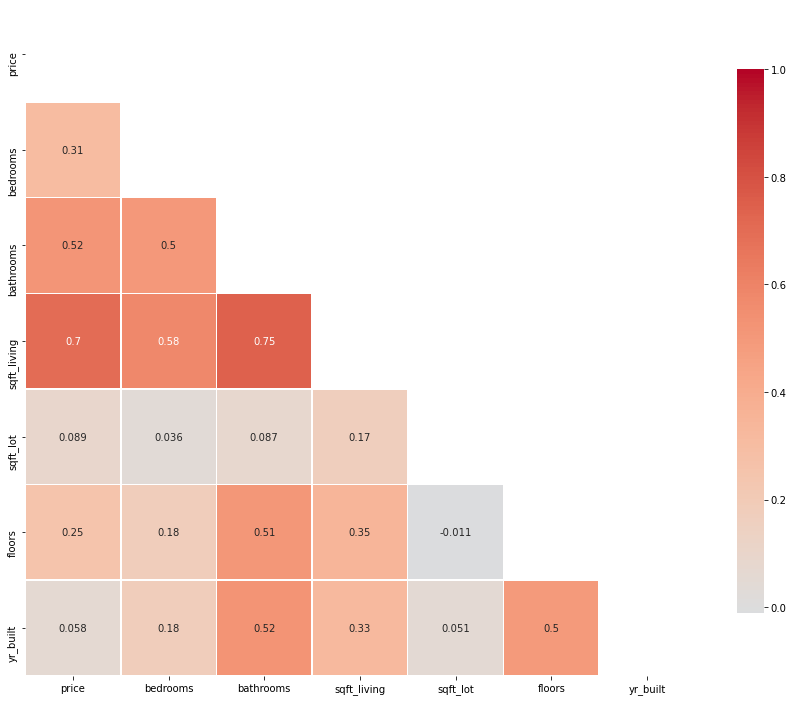

In [31]:
# HEATMAP FOR CORRELATION DATAFRAME

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# BASELINE MODEL

In [32]:
# DROPPING COLUMNS
df.drop(columns = ['floors', 'yr_built'], inplace = True)

start

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame 'df' containing your data
# X contains the features, and y contains the target variable 'price'
X = df[['bedrooms', 'bathrooms', 'sqft_living']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a simple linear regression model
baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 61845169945.02
R-squared: 0.49


end

In [34]:
print(df.dtypes)

price           float64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
waterfront     category
condition      category
grade          category
dtype: object


In [ ]:
# Select only the categorical columns for one-hot encoding
categorical_columns = df.select_dtypes(include=['category'])

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns.columns)

# Define your target variable and predictor variables
target_variable = 'price'  # Replace with your target variable name
predictor_variables = df_encoded.drop(target_variable, axis=1)
predictor_variables = sm.add_constant(predictor_variables)  # Add a constant term for the intercept

# Create the model
baseline_model = sm.OLS(df_encoded[target_variable], predictor_variables).fit()

# Print the summary of the model
print(baseline_model.summary())

In [ ]:
residuals = baseline_model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [ ]:
# Correlation 'Price' vs all variables

data_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

In [ ]:
# PLOTING RELATIONSHIP BETWEEN PRICE (BEDROOM, BATHROOM, SQFT_LINVING AND GRADE) AFTER ELIMINATING OUTLIERS

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'grade']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

In [ ]:
# Regression Plots for 'Price vs Sqft_living'

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(baseline_model, "sqft_living", fig=fig)
plt.show()

In [ ]:
# PREPARATION OF BATHROOMS COLUMNS

df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade']] # deleted foors and yr_built
df.loc[df['bathrooms'] <= 1,'bathrooms'] = 1
df.loc[(df['bathrooms'] > 1) & (df['bathrooms'] <= 2),'bathrooms'] = 2
df.loc[(df['bathrooms'] > 2) & (df['bathrooms'] <= 3),'bathrooms'] = 3
df.loc[(df['bathrooms'] > 3) & (df['bathrooms'] <= 4),'bathrooms'] = 4
df.loc[(df['bathrooms'] > 4) & (df['bathrooms'] <= 5),'bathrooms'] = 5
df.loc[(df['bathrooms'] > 5) & (df['bathrooms'] <= 6),'bathrooms'] = 6
df.loc[(df['bathrooms'] > 6) & (df['bathrooms'] <= 7),'bathrooms'] = 7
df.loc[(df['bathrooms'] > 7) & (df['bathrooms'] <= 8),'bathrooms'] = 8

In [ ]:
# CREATING A COPY OF DATA FRAME BEFORE MODIFIYING WITH DUMMIES FOR FUTURE MODELS

df_model = df.copy()
df_model

In [ ]:
pd.plotting.scatter_matrix(df, figsize=(18,12));


In [ ]:
# CHANGING 'BATHROOMS' TO INT64

df['bathrooms'] = df['bathrooms'].astype('Int64')

In [ ]:
# ADDING DUMMIES FOR "GRADE", "BEDROOMS" AND "BATHROOMS" 

df_dummies = pd.get_dummies(df, columns=['grade', 'bedrooms', 'bathrooms'])

In [ ]:
#df.columns
df_dummies

In [ ]:
df_dummies.columns

In [ ]:
df_dummies.columns = df_dummies.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [ ]:
outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'condition', 
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'grade_10_Very_Good',
       'grade_11_Excellent','bedrooms_2', 'bedrooms_3',
       'bedrooms_4', 'bedrooms_5',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4', 'bathrooms_5']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=df_dummies).fit()

model_2.summary()


In [ ]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [ ]:
# SELECTING 'X' AND 'Y' VALUES FROM 'DATA_LOG' FOR TRAIN-TEST SPLIT
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

df_dummies

In [ ]:
# TRAIN-TEST SPLIT0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
X_train = pd.get_dummies(X_train, columns=['condition'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['condition'], drop_first=True)

# Now, you should have columns like 'condition_Average', 'condition_Very Good', etc.
# These columns represent the different categories in the 'condition' column.

# Next, you can fit your linear regression model.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions and calculate mean squared error as before.
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)








In [ ]:
# CROSS VALIDATION RESULTS 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

In [ ]:
# PLOTING PRICE
sns.distplot(df_dummies['price'])

In [ ]:
# PLOTING SQFT_LIVING
sns.distplot(df_dummies['sqft_living'])

# Data  log transformation

In [ ]:
# PERFORM DATA LOG TRANSFORMATION 

data_log = pd.DataFrame([])
   
data_log['price_log'] = np.log(df_model['price'])
data_log['bedrooms'] = (df_model['bedrooms'])
data_log['bathrooms'] = (df_model['bathrooms'])
data_log['sqft_living_log'] = np.log(df_model['sqft_living'])
data_log['sqft_lot_log'] = np.log(df_model['sqft_lot'])
data_log['condition'] = (df_model['condition'])
data_log['grade'] = (df_model['grade'])
   
data_log.hist(figsize  = [18,8]);

In [ ]:
# CHANGING 'BATHROOMS' TO INT64

data_log['bathrooms'] = data_log['bathrooms'].astype('Int64')

In [ ]:
#ADDING DUMMIES FOR "GRADE", "BEDROOMS" AND "BATHROOMS" 

data_log = pd.get_dummies(data_log, columns=['grade', 'bedrooms','bathrooms','condition'])

# MODEL 3

In [ ]:
data_log

In [ ]:
data_log.columns

In [ ]:
data_log.columns = data_log.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [ ]:
data_log.columns

In [ ]:
outcome = 'price_log'
x_cols = ['sqft_living_log', 'sqft_lot_log', 'grade_10_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
       'grade_7_Average', 'grade_8_Good', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_3 = ols(formula=formula, data=data_log).fit()

model_3.summary()